<a href="https://colab.research.google.com/github/WeiKuoLi/Honghui-repo/blob/main/text_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install -qqq transformers datasets matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [11]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
import torch
from transformers import AutoTokenizer, AutoModel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate 10 sample sentences
sentences = [
    "The cat sat on the mat.",
    "The dog barked loudly.",
    "1 + 1 = 2",
    "one plus one equals two",
    "Who are you?",
    "Who is him?"
]

In [8]:
# Load a small BERT model and tokenizer from Hugging Face
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).eval()

# Tokenize sentences and get embeddings
with torch.no_grad():
    inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)
    input_ids = inputs["input_ids"]
    attention_mask = inputs["attention_mask"]

    # Get model outputs
    outputs = model(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state
    # Take the mean of the token embeddings to get a single embedding for each sentence
    embeddings = outputs.mean(dim=1).cpu().numpy()
    print(f"Embeddings shape: {embeddings.shape}")


Embeddings shape: (6, 768)


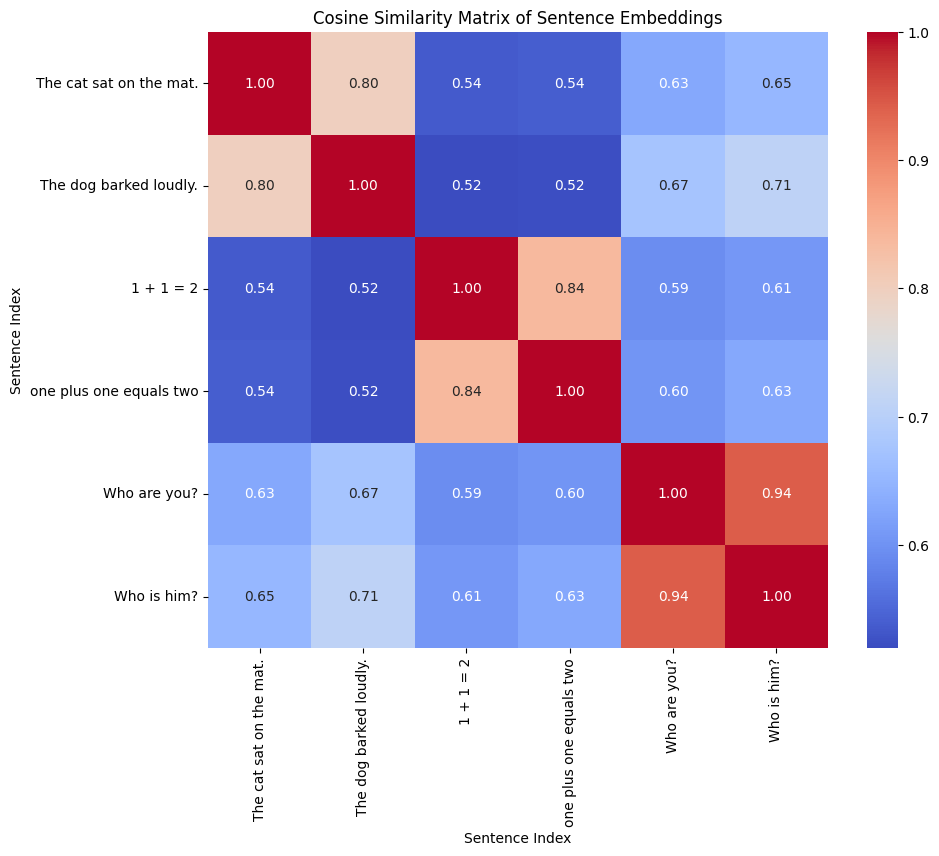

In [9]:
# Compute cosine similarity matrix using NumPy
norms = ((embeddings**2).sum(axis=1, keepdims=True))**0.5
normalized_embeddings = embeddings / norms
normalized_embeddings_1 = normalized_embeddings[:,np.newaxis,:]
normalized_embeddings_2 = normalized_embeddings[np.newaxis,:,:]
similarity_matrix =(normalized_embeddings_1 * normalized_embeddings_2).sum(axis=2)
# similarity_matrix = np.dot(normalized_embeddings, normalized_embeddings.T)

# Plot the cosine similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=sentences, yticklabels=sentences)
plt.title("Cosine Similarity Matrix of Sentence Embeddings")
plt.xlabel("Sentence Index")
plt.ylabel("Sentence Index")
plt.show()
